In [1]:
import pandas as pd
import os
import sys
import glob
import json
from os.path import expanduser
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
from agavepy.agave import Agave, AgaveError
from agavepy.files.download import files_download
%matplotlib inline




%load_ext autoreload
%reload_ext autoreload
%autoreload 2


from pysd2cat.analysis import live_dead_analysis as lda
from pysd2cat.analysis.Names import Names

from pysd2cat.data import pipeline

out_dir='.' # test harness output



/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/src/flowcytometrytools/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/src/flowcytometrytools/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib

In [2]:

    

experiments = [
    'experiment.uw_biofab.34601',
    'experiment.uw_biofab.34600'
]
overwrite=False
   
for experiment in experiments[0:1]:
    data_dir = os.path.join('data/biofab', experiment)
    all_data_file = os.path.join(data_dir, 'data.csv')

    if overwrite or not os.path.exists(all_data_file):
        meta_df = make_experiment_metadata_dataframe(experiment)
        fetch_data(meta_df, data_dir)
        meta_df[Names.FILENAME] = meta_df.apply(lambda x:  data_dir + "/" + x['agave_path'], axis=1)
        all_data_df = pipeline.get_data_and_metadata_df(meta_df, '.', fraction=None, max_records=None)
        all_data_df.to_csv(all_data_file)


In [179]:
data_dir = os.path.join( experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)
experiment_df

/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (11,13,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,agave_path,agave_system,challenge_problem,experiment_id,experiment_reference,experiment_reference_url,file_type,filename,hpc_path,jupyter_path,kill_method,kill_volume,kill_volume_unit,lab,level,measurement_type,sample_id,stain,stain_volume,stain_volume_unit,strain,strain_lab_id,strain_sbh_uri,temperature,FSC-A,SSC-A,FL1-A,FL2-A,FL3-A,FL4-A,FSC-H,SSC-H,FL1-H,FL2-H,FL3-H,FL4-H,Width,Time,index,live
0,/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,data-sd2e-community,YEAST_STATES,experiment.uw_biofab.34601,YeastSTATES-LiveDeadClassification,https://docs.google.com/document/d/1ztX-c9e4vplz9lYlHlGOWzGdW5Veb_RleOowb-PQ2tQ,FCS,data/biofab/experiment.uw_biofab.34601//uploads/biofab/201907/34601/op_211581/37842-A01.fcs,/work/projects/SD2E-Community/prod/data/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,/home/jupyter/sd2e-community/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,Ethanol,980.0,microliter,uw_biofab,0,FLOW,sample.uw_biofab.395993.experiment.uw_biofab.34601,SYTOX Red Stain,3.0,microliter,CEN.PK2 - MAT A,name.uw_biofab.22800,https://hub.sd2e.org/user/sd2e/design/CEN0x2EPK20x200x2D0x20MAT0x20A/1,30.0,568770.0,135710.0,3285.0,1046.0,1536.0,4319.0,990229.0,214814.0,3186.0,714.0,1415.0,4922.0,36.0,228.0,0,1
1,/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,data-sd2e-community,YEAST_STATES,experiment.uw_biofab.34601,YeastSTATES-LiveDeadClassification,https://docs.google.com/document/d/1ztX-c9e4vplz9lYlHlGOWzGdW5Veb_RleOowb-PQ2tQ,FCS,data/biofab/experiment.uw_biofab.34601//uploads/biofab/201907/34601/op_211581/37842-A01.fcs,/work/projects/SD2E-Community/prod/data/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,/home/jupyter/sd2e-community/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,Ethanol,980.0,microliter,uw_biofab,0,FLOW,sample.uw_biofab.395993.experiment.uw_biofab.34601,SYTOX Red Stain,3.0,microliter,CEN.PK2 - MAT A,name.uw_biofab.22800,https://hub.sd2e.org/user/sd2e/design/CEN0x2EPK20x200x2D0x20MAT0x20A/1,30.0,764023.0,137401.0,12503.0,3969.0,5580.0,3597.0,1122774.0,215925.0,10866.0,3284.0,5812.0,2895.0,43.0,257.0,1,0
2,/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,data-sd2e-community,YEAST_STATES,experiment.uw_biofab.34601,YeastSTATES-LiveDeadClassification,https://docs.google.com/document/d/1ztX-c9e4vplz9lYlHlGOWzGdW5Veb_RleOowb-PQ2tQ,FCS,data/biofab/experiment.uw_biofab.34601//uploads/biofab/201907/34601/op_211581/37842-A01.fcs,/work/projects/SD2E-Community/prod/data/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,/home/jupyter/sd2e-community/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,Ethanol,980.0,microliter,uw_biofab,0,FLOW,sample.uw_biofab.395993.experiment.uw_biofab.34601,SYTOX Red Stain,3.0,microliter,CEN.PK2 - MAT A,name.uw_biofab.22800,https://hub.sd2e.org/user/sd2e/design/CEN0x2EPK20x200x2D0x20MAT0x20A/1,30.0,1340074.0,66806.0,3202.0,1980.0,5442.0,1301.0,575288.0,6798.0,552.0,374.0,488.0,503.0,72.0,274.0,2,0
3,/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,data-sd2e-community,YEAST_STATES,experiment.uw_biofab.34601,YeastSTATES-LiveDeadClassification,https://docs.google.com/document/d/1ztX-c9e4vplz9lYlHlGOWzGdW5Veb_RleOowb-PQ2tQ,FCS,data/biofab/experiment.uw_biofab.34601//uploads/biofab/201907/34601/op_211581/37842-A01.fcs,/work/projects/SD2E-Community/prod/data/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,/home/jupyter/sd2e-community/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,Ethanol,980.0,microliter,uw_biofab,0,FLOW,sample.uw_biofab.395993.experiment.uw_biofab.34601,SYTOX Red Stain,3.0,microliter,CEN.PK2 - MAT A,name.uw_biofab.22800,https://hub.sd2e.org/user/sd2e/design/CEN0x2EPK20x200x2D0x20MAT0x20A/1,30.0,619111.0,120336.0,11580.0,4187.0,7099.0,2422.0,894236.0,179991.0,10396.0,3708.0,6115.0,1962.0,42.0,297.0,3,0
4,/uploads/biofab/201907/34601/op_211581/37842-A01.fcs,data-sd2e-community,YEAST_STATES,experiment.uw_biofab.34601,YeastSTATES-LiveDeadClassification,https://docs.google.com/document/d/1ztX-c9e4vplz9lYlHlGOWzGdW5Veb_RleOowb-PQ2tQ

In [170]:
def extract_run(x):
    description = x['Data and Split Description']
    run = run = "_".join(description.split('_')[0:2])
    return run

def extract_kill(x):
    if get_stain(x):
        description = x['Data and Split Description']
        return float(description.split('_')[-1])
    else:
        description = x['Data and Split Description']
        return float(description.split('_')[-3])        

def get_random_state(x):
    return x['Data and Split Description'].split('_')[2]

def get_stain(x):
    return 'no_stain' not in x['Data and Split Description']

# data/biofab/experiment.uw_biofab.34600_1_0_64.0

def get_leader_board_df(leader_board):
 
    leader_board = pd.read_html(leader_board)[0]
    leader_board = leader_board.sort_values(by=['Date', 'Time'], ascending=True)

    #leader_board=leader_board.dropna()
    #leader_board = leader_board.loc[leader_board['Data and Split Description'].str.contains('__')]

    leader_board.loc[:, 'run'] = leader_board.apply(extract_run, axis = 1)
    leader_board.loc[:, 'kill'] = leader_board.apply(extract_kill, axis = 1)
    leader_board.loc[:,'random_state'] = leader_board.apply(get_random_state, axis=1)
    leader_board.loc[:,'stain'] = leader_board.apply(get_stain, axis=1)
    return leader_board

def case_exists(leader_board_df, input_file, rand, stain):
    match = leader_board_df.loc[(leader_board_df['run'] == get_run_from_path(input_file)) &(leader_board_df['random_state'] == str(rand)) & (leader_board_df['stain'] == stain)]
    return len(match) > 0
    
leader_board_path=os.path.join(out_dir, 'test_harness_results/custom_classification_leaderboard.html')
leader_board_df = get_leader_board_df(leader_board_path)
leader_board_df

,Run ID,Date,Time,Model Name,Model Author,Num Classes,Accuracy,Balanced Accuracy,AUC Score,Average Precision,F1 Score,Precision,Recall,Samples In Train,Samples In Test,Model Description,Column Predicted,Num Features Used,Data and Split Description,Normalized,Num Features Normalized,Feature Extraction,Was Untested Data Predicted,run,kill,random_state,stain
209,aYRXkWqJxVAlR,2019-07-26,01:15:45,random_forest_classification,Hamed,2,0.514,0.514,0.520,0.518,0.514,0.514,0.514,384000,96000,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,data/biofab/experiment.uw_biofab.34600_0_0_29,True,12,rfpimp_permutation,False,data/biofab/experiment.uw_biofab.34600,29.0,0,True
0,ErZZ7QXrVoqEA,2019-07-26,01:22:33,random_forest_classification,Hamed,2,0.995,0.994,1.000,1.000,0.996,0.994,0.997,319734,79934,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,data/biofab/experiment.uw_biofab.34600_0_0_980.0,True,12,rfpimp_permutation,False,data/biofab/experiment.uw_biofab.34600,980.0,0,True
48,6522japJ8aGO,2019-07-26,01:24:38,random_forest_classification,Hamed,2,0.982,0.982,0.998,0.998,0.982,0.979,0.985,383668,95917,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,data/biofab/experiment.uw_biofab.34600_0_0_570.0,True,12,rfpimp_permutation,False,data/biofab/experiment.uw_biofab.34600,570.0,0,True
90,agWq7awXlOwoo,2019-07-26,01:27:13,random_forest_classification,Hamed,2,0.872,0.872,0.947,0.952,0.869,0.891,0.847,384000,96000,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,data/biofab/experiment.uw_biofab.34600_0_0_370.0,True,12,rfpimp_permutation,False,data/biofab/experiment.uw_biofab.34600,370.0,0,True
107,6O2XwZbGAXaZl,2019-07-26,01:30:25,random_forest_classification,Hamed,2,0.849,0.849,0.930,0.936,0.845,0.867,0.824,384000,96000,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,data/biofab/experiment.uw_biofab.34600_0_0_250.0,True,12,rfpimp_permutation,False,data/biofab/experiment.uw_biofab.34600,250.0,0,True
146,EvkX6vQv35eze,2019-07-26,01:33:40,random_forest_classification,Hamed,2,0.776,0.776,0.861,0.872,0.767,0.799,0.737,384000,96000,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,data/biofab/experiment.uw_biofab.34600_0_0_170.0,True,12,rfpimp_permutation,False,data/biofab/experiment.uw_biofab.34600,170.0,0,True
159,Q6RBaEyM88Z6e,2019-07-26,01:37:08,random_forest_classification,Hamed,2,0.692,0.692,0.762,0.775,0.675,0.715,0.639,384000,96000,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,data/biofab/experiment.uw_biofab.34600_0_0_105.0,True,12,rfpimp_permutation,False,data/biofab/experiment.uw_biofab.34600,105.0,0,True
201,aMG3BpLXJqQ3R,2019-07-26,01:40:41,random_forest_classification,Hamed,2,0.541,0.541,0.557,0.549,0.542,0.541,0.542,384000,96000,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,data/biofab/experiment.uw_biofab.34600_0_0_64.0,True,12,rfpimp_permutation,False,data/biofab/experiment.uw_biofab.34600,64.0,0,True
213,aYQONNk2p6P7k,2019-07-26,01:44:25,random_forest_classification,Hamed,2,0.514,0.514,0.520,0.517,0.514,0.514,0.513,384000,96000,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,data/biofab/experiment.uw_biofab.34600_0_0_29,True,12,rfpimp_permutation,False,data/biofab/experiment.uw_biofab.34600,29.0,0,True
31,QaMgWLYrb7MGq,2019-07-26,01:48:37,random_forest_classification,Hamed,2,0.995,0.994,1.000,1.000,0.996,0.994,0.998,319734,79934,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_sampl

No handles with labels found to put in legend.


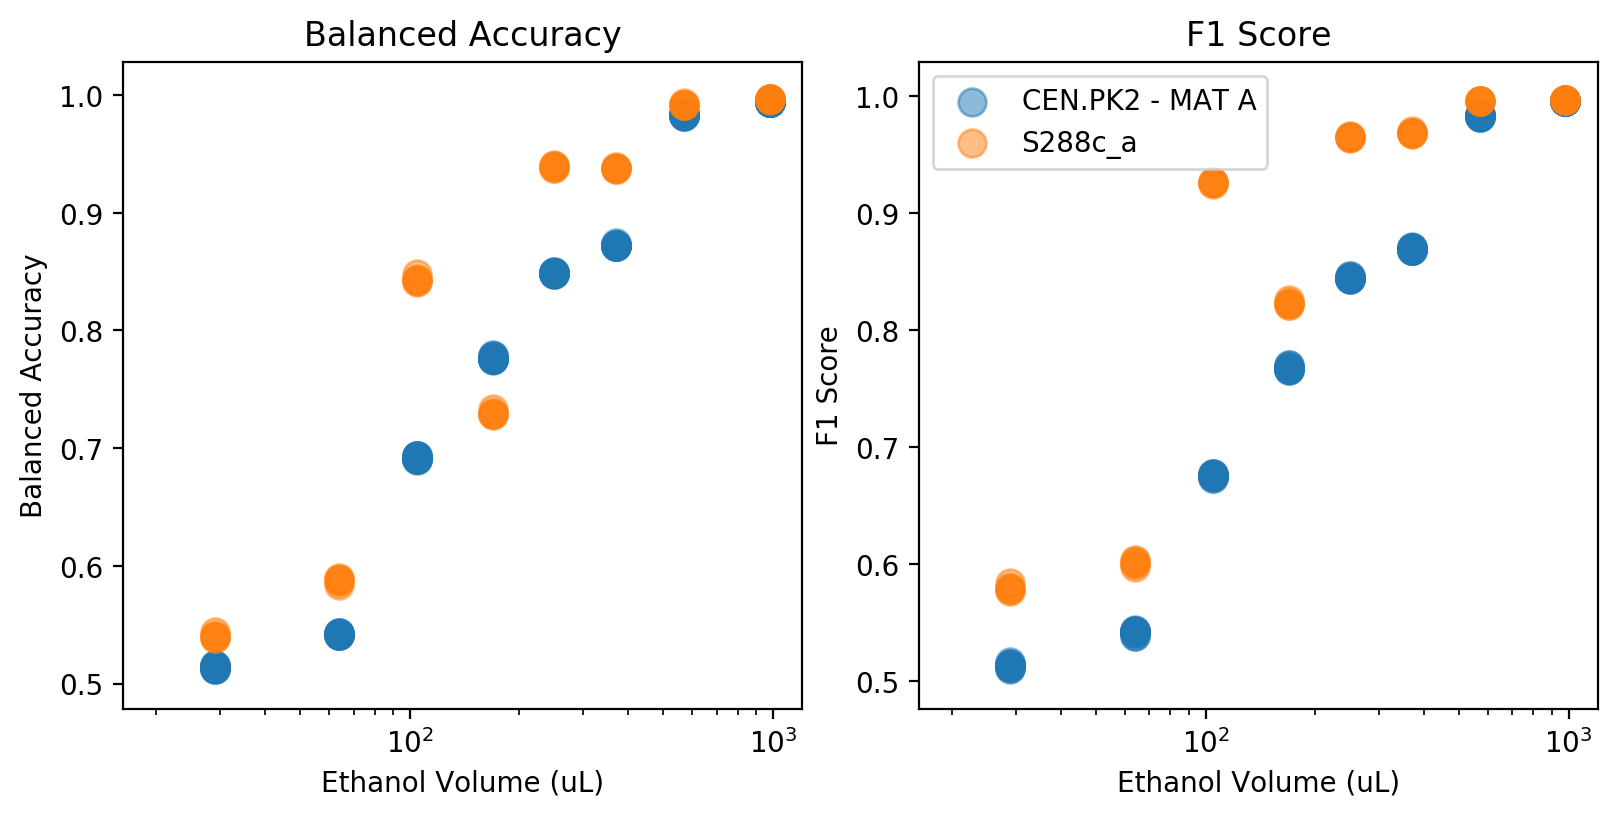

In [181]:
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
%matplotlib inline

run_strain = {
    'data/biofab/experiment.uw_biofab.34600' : 'CEN.PK2 - MAT A',
       'data/biofab/experiment.uw_biofab.34601' : 'S288c_a'
}

#metric='F1 Score'
#metric='Accuracy'
#metrics=['Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics=['Balanced Accuracy', 'F1 Score']

fig, ax = plt.subplots(nrows=1, ncols=len(metrics), figsize=(4*len(metrics), 4), dpi=200)
#plt.rcParams['font.size'] = 1
experiments = leader_board_df.run.unique()
plot_df=leader_board_df.loc[leader_board_df.stain == True]
for j, col in enumerate(ax):

    #for rs in plot_df.kill.unique():
    df = plot_df

   
    #xvals=df['kill']


    col.set_xlabel("Ethanol Volume (uL)")
    col.set_ylabel(metrics[j])

    for experiment in experiments:
        xvals=df.loc[df['run'] == experiment]['kill']
        yvals=df.loc[df['run'] == experiment][metrics[j]]
        col.scatter(xvals, yvals,s=100, alpha=0.5, label=run_strain[experiment])

    lims = [ .65, 1
    ]

    #col.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
    col.set_title(metrics[j])
    col.set_xscale('log')
    #col.set_xlim([0.65, 1])
    #col.set_ylim([0.65, 1])
    #col.set(adjustable='box', aspect='equal')
    #plt.axis([0.85, 1, 0.85, 1])
    plt.legend()
    #plt.axis('equal')
    #plt.gca().set_aspect('equal', adjustable='box')



plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)






In [154]:
# Get all channels from a sample and plot as histogram.

volumes=experiment_df.kill_volume.dropna().unique()
volumes.sort()
channels=['FSC-A', 'SSC-A', 'FL1-A', 'FL2-A', 'FL3-A', 'FL4-A', 'FSC-H', 'SSC-H', 'FL1-H', 'FL2-H', 'FL3-H', 'FL4-H']
channels.sort()

fig = plt.figure(figsize=(4*len(volumes), 4*len(channels)), dpi=200)

bins = [10**x for x in range(0, 10) ] 
bins.sort()
live_output_col='live'
#for volume in volumes:
for i, volume in enumerate(volumes):
    df = experiment_df.loc[experiment_df['kill_volume']==volume]

    for j, channel in enumerate(channels):
        ax = fig.add_subplot(len(channels), len(volumes), (j*len(volumes))+i+1)


    
        #volume = volumes[j]
        #for rs in plot_df.kill.unique():

        #xvals=df[channel]
        #xvals=df['kill']


        ax.set_xlabel(channel + " Intensity")
        ax.set_ylabel("Frequency")

        #col.scatter(xvals, yvals,s=100, alpha=0.5)
        ax.hist(df[channel], bins=100, alpha=0.5, label="All")
        ax.hist(df.loc[df[live_output_col]==1][channel], bins=100, alpha=0.5, label="Live")
        lims = [ .65, 1
        ]

        #col.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
        ax.set_title(channel + " Intensity, Ethanol " + str(volume) + "uL")
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim([1, 10e9])
        ax.set_ylim([1, 10e6])
        #col.set(adjustable='box', aspect='equal')
        #plt.axis([0.85, 1, 0.85, 1])
        plt.legend()
        #plt.axis('equal')
        #plt.gca().set_aspect('equal', adjustable='box')

#plt.axis([0, 10e7, 0, 10e6])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)




In [159]:
all=experiment_df.loc[experiment_df['kill_volume'] == 250.0]['FL1-A'].sum()
live=experiment_df.loc[(experiment_df['kill_volume'] == 250.0) & (experiment_df['live'] == 1)]['FL1-A'].sum()
ratio = live/all
print(all)
print(live)
print(ratio)
print(experiment_df.loc[(experiment_df['kill_volume'] == 250.0)]['live'].mean())

407045863.0
376115824.0
0.9240133807722792
0.953375


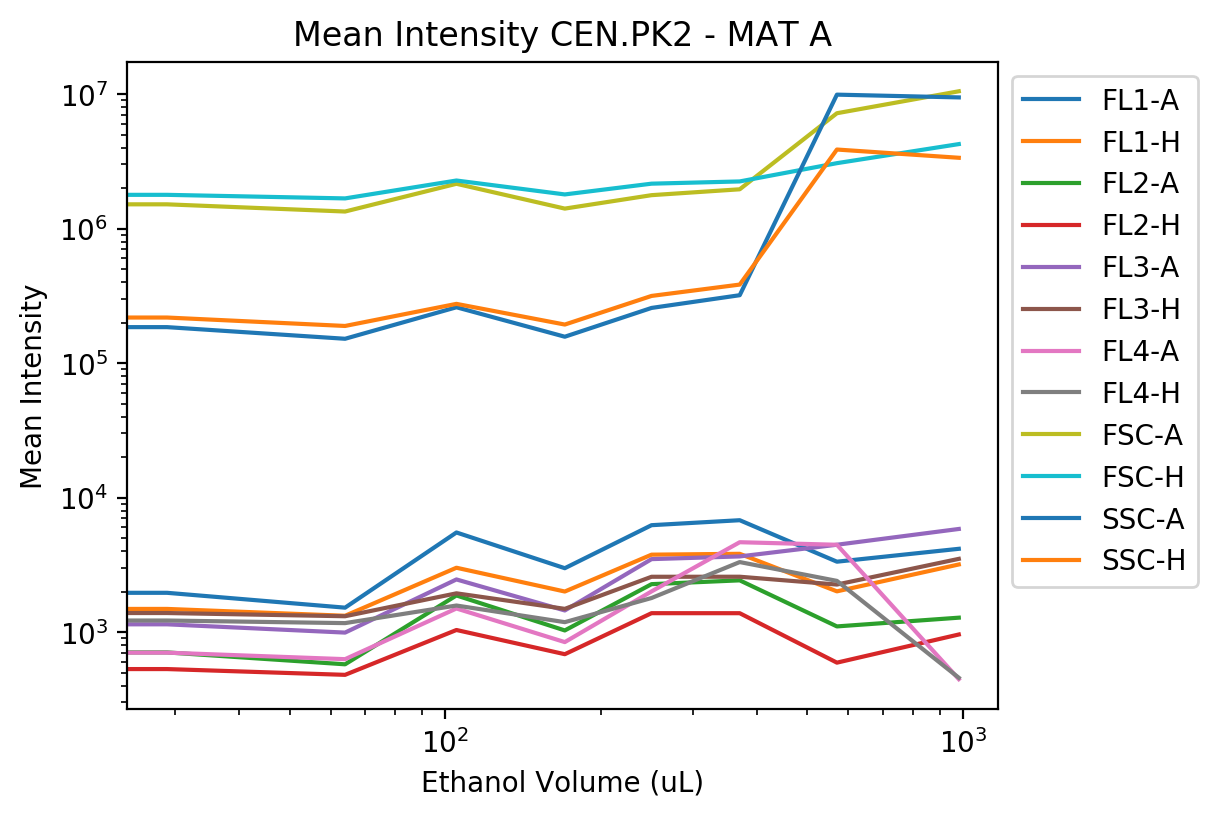

In [180]:
# Overlay the channels at different concentrations to see how they shift

volumes=experiment_df.kill_volume.dropna().unique()
volumes.sort()
channels=['FSC-A', 'SSC-A', 'FL1-A', 'FL2-A', 'FL3-A', 'FL4-A', 'FSC-H', 'SSC-H', 'FL1-H', 'FL2-H', 'FL3-H', 'FL4-H']
channels.sort()

fig = plt.figure( dpi=200)

bins = [10**x for x in range(0, 10) ] 
bins.sort()
live_output_col='live'
#for volume in volumes:

#for j, channel in enumerate(channels):

ax = fig.add_subplot(111)
#    for i, volume in enumerate(volumes):
df = experiment_df.groupby(['kill_volume']).agg(np.mean).reset_index()

experiment_id = experiment_df.strain.dropna().unique()[0]
#volume = volumes[j]
#for rs in plot_df.kill.unique():

#xvals=df[channel]
#xvals=df['kill']


ax.set_xlabel("Ethanol Volume (uL)")
ax.set_ylabel("Mean Intensity")

#col.scatter(xvals, yvals,s=100, alpha=0.5)
for j, channel in enumerate(channels):
    ax.plot(df['kill_volume'], df[channel], label=channel)
#ax.hist(df.loc[df[live_output_col]==1][channel], bins=bins, alpha=0.5, label="Live")
lims = [ .65, 1
]

#plt.xticks(range(0, len(df)), df['kill_volume'])


#col.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
ax.set_title("Mean Intensity " + str(experiment_id))
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim([1, 10e9])
#ax.set_ylim([1, 10e6])
#col.set(adjustable='box', aspect='equal')
#plt.axis([0.85, 1, 0.85, 1])
plt.legend( bbox_to_anchor=(1.0, 1.0),
          ncol=1)
#plt.axis('equal')
#plt.gca().set_aspect('equal', adjustable='box')

#plt.axis([0, 10e7, 0, 10e6])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)



In [118]:
robs_experiment = pd.read_csv('../resources/6-12_percent_dead.csv')
robs_experiment

,Treatment,% Dead,culture vol (ul),Ethanol vol (ul),% Ethanol
0,Control 1,0.00,1000,0,0.0
1,Control 2,0.35,1000,0,0.0
2,Control 3,0.32,1000,0,0.0
3,10% Ethanol,0.17,1000,110,0.1
4,20% Ethanol,0.97,1000,250,0.2
5,30% Ethanol,1.00,1000,420,0.3
6,40% Ethanol,1.00,1000,680,0.4
7,50% Ethanol,1.00,1000,1000,0.5
8,60% Ethanol,1.00,1000,1500,0.6
9,70% Ethanol,1.00,1000,2300,0.7


Text(0.5, 0, 'Ethanol Volume (uL)')

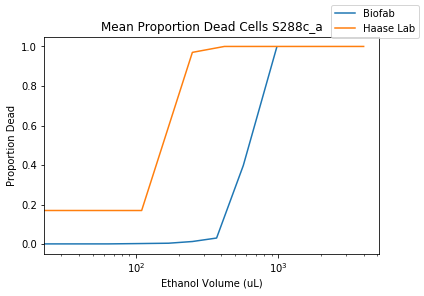

In [150]:
# For each sample, what proportion are dead?

robs_experiment = pd.read_csv('../resources/6-12_percent_dead.csv')


dead_proportion = experiment_df.dropna().groupby(['kill_volume', 'sample_id'])['live'].agg(lambda x: 1 - x.sum()/len(x)).groupby(['kill_volume']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})

volumes=list(dead_proportion['kill_volume'].values)
volumes.extend(robs_experiment['Ethanol vol (ul)'].values)
volumes=list(set(volumes))
volumes.sort()

robs_experiment.merge(pd.DataFrame({"Ethanol vol (ul)" : volumes}), on='Ethanol vol (ul)', how='right').sort_values(by=['Ethanol vol (ul)'])
dead_proportion.merge(pd.DataFrame({"kill_volume" : volumes}), on='kill_volume', how='right').sort_values(by=['kill_volume'])




#experiment_id = experiment_df.experiment_id.dropna().unique()[0]
experiment_id = experiment_df.strain.dropna().unique()[0]
#print(dead_proportion)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dead_proportion['kill_volume'], dead_proportion['dead'], label="Biofab")
ax.plot(robs_experiment["Ethanol vol (ul)"], robs_experiment['% Dead'], label="Haase Lab")
#ax.bar()
ax.set_xscale('log')
fig.legend()
plt.title("Mean Proportion Dead Cells "  + experiment_id)
ax.set_ylabel("Proportion Dead")
ax.set_xlabel("Ethanol Volume (uL)")
#plt.xticks(range(0, len(volumes)), volumes)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


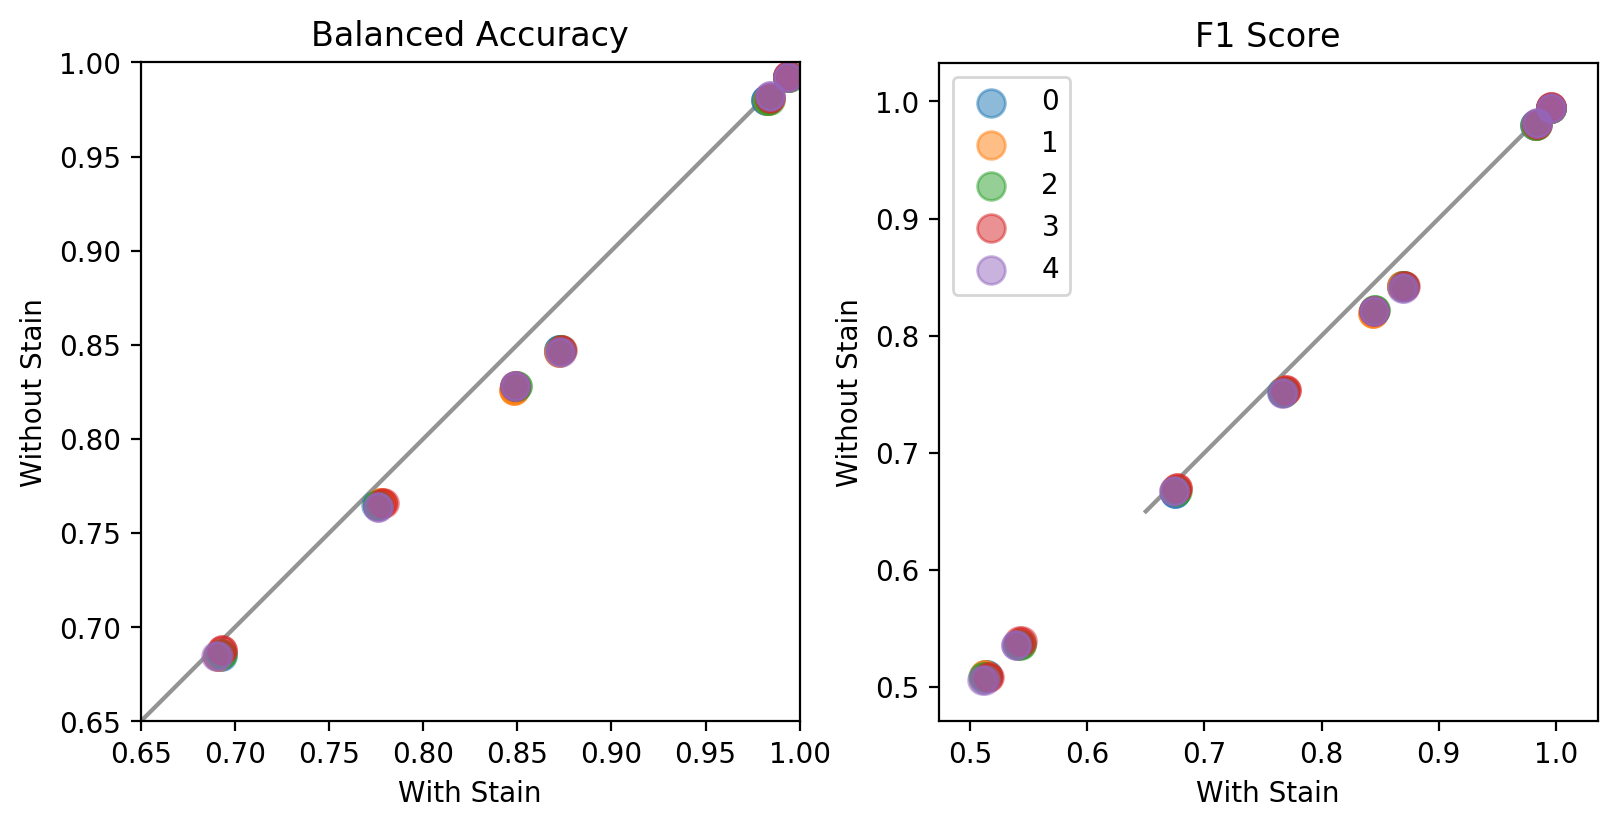

In [172]:
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
%matplotlib inline


#metric='F1 Score'
#metric='Accuracy'
#metrics=['Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics=['Balanced Accuracy', 'F1 Score']

fig, ax = plt.subplots(nrows=1, ncols=len(metrics), figsize=(4*len(metrics), 4), dpi=200)
#plt.rcParams['font.size'] = 1


leader_board=leader_board_df.loc[leader_board_df['run'] == experiments[0]]

stain = leader_board.loc[(leader_board['stain'] == True) ]
no_stain = leader_board.loc[(leader_board['stain'] == False) ]

plot_df = stain.merge(no_stain, on=['run', 'random_state', 'kill'], how='inner')



for j, col in enumerate(ax):

    for rs in plot_df.random_state.unique():
        df = plot_df.loc[plot_df['random_state'] == rs]

        xvals=df[metrics[j]+"_x"]
        yvals=df[metrics[j]+"_y"]


        col.set_xlabel("With Stain")
        col.set_ylabel("Without Stain")

        col.scatter(xvals, yvals,s=100, alpha=0.5, label=rs)

        lims = [ .65, 1
        ]

        col.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
        col.set_title(metrics[j])
        col.set_xlim([0.65, 1])
        col.set_ylim([0.65, 1])
        col.set(adjustable='box', aspect='equal')
        #plt.axis([0.85, 1, 0.85, 1])
        plt.legend()
        plt.axis('equal')
        plt.gca().set_aspect('equal', adjustable='box')



plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)






In [173]:
plot_df.apply(lambda x: x['Balanced Accuracy_x'] - x['Balanced Accuracy_y'], axis=1).agg([np.mean, np.std])


mean    0.009132
std     0.009010
dtype: float64